In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("Happiness-WVS-vs-Gallup.csv", low_memory=False)
df_continents = pd.read_csv("countries_continents.csv", low_memory=False)
df.rename(columns = {
    "Entity": "Country",
    "Life satisfaction in Cantril Ladder (World Happiness Report 2022)": "Life Satisfaction",
    "Share of people who are happy (World Value Survey 2014)": "Happiness"
    }, 
    inplace=True
    )

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55734 entries, 0 to 55733
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            55734 non-null  object 
 1   Code                               54104 non-null  object 
 2   Year                               55734 non-null  int64  
 3   Happiness                          237 non-null    float64
 4   Life Satisfaction                  2244 non-null   float64
 5   Population (historical estimates)  55656 non-null  float64
 6   Continent                          285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 3.0+ MB


In [16]:
df_continents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    194 non-null    object
 1   Continent  194 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [19]:
df_full_continent = df.iloc[:,0:6].merge(df_continents, on='Country', how='left')

In [20]:
df_full_continent.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 55734 entries, 0 to 55733
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            55734 non-null  object 
 1   Code                               54104 non-null  object 
 2   Year                               55734 non-null  int64  
 3   Happiness                          237 non-null    float64
 4   Life Satisfaction                  2244 non-null   float64
 5   Population (historical estimates)  55656 non-null  float64
 6   Continent                          46250 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 3.4+ MB


In [21]:
df_full_continent.head(50)

,Country,Code,Year,Happiness,Life Satisfaction,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2006,NaN,3.723590,26433058.0,Asia
2,Afghanistan,AFG,2007,NaN,4.401778,27100542.0,Asia
3,Afghanistan,AFG,2008,NaN,4.758381,27722281.0,Asia
4,Afghanistan,AFG,2009,NaN,3.831719,28394806.0,Asia
5,Afghanistan,AFG,2010,NaN,3.782938,29185511.0,Asia
6,Afghanistan,AFG,2011,NaN,3.572100,30117411.0,Asia
7,Afghanistan,AFG,2012,NaN,3.130896,31161378.0,Asia
8,Afghanistan,AFG,2013,NaN,3.982855,32269592.0,Asia
9,Afghanistan,AFG,2014,NaN,4.220169,33370803.0,Asia


In [23]:
continent_filter = df_full_continent["Continent"].isnull()
df_full_continent[continent_filter]

,Country,Code,Year,Happiness,Life Satisfaction,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN
260,Africa,NaN,-10000,NaN,NaN,227611.0,NaN
261,Africa,NaN,-9000,NaN,NaN,323035.0,NaN
262,Africa,NaN,-8000,NaN,NaN,462967.0,NaN
263,Africa,NaN,-7000,NaN,NaN,670019.0,NaN
...,...,...,...,...,...,...,...
55211,Yemen Arab Republic,OWID_YAR,2015,NaN,NaN,NaN,NaN
55212,Yemen People's Republic,OWID_YPR,2015,NaN,NaN,NaN,NaN
55213,Yugoslavia,OWID_YGS,2015,NaN,NaN,NaN,NaN
55473,Zanzibar,OWID_ZAN,2015,NaN,NaN,NaN,NaN


In [26]:
df_full_continent.dropna(subset="Continent", inplace=True)

In [27]:
df_full_continent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46250 entries, 1 to 55732
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            46250 non-null  object 
 1   Code                               46250 non-null  object 
 2   Year                               46250 non-null  int64  
 3   Happiness                          210 non-null    float64
 4   Life Satisfaction                  2049 non-null   float64
 5   Population (historical estimates)  46250 non-null  float64
 6   Continent                          46250 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.8+ MB


In [16]:
df.groupby("Country").describe()

Year                                                      \
            count    mean std     min     25%     50%     75%     max   
Country                                                                 
Afghanistan   1.0  2015.0 NaN  2015.0  2015.0  2015.0  2015.0  2015.0   
Albania       1.0  2015.0 NaN  2015.0  2015.0  2015.0  2015.0  2015.0   
Algeria       1.0  2015.0 NaN  2015.0  2015.0  2015.0  2015.0  2015.0   
Andorra       1.0  2015.0 NaN  2015.0  2015.0  2015.0  2015.0  2015.0   
Angola        1.0  2015.0 NaN  2015.0  2015.0  2015.0  2015.0  2015.0   
...           ...     ...  ..     ...     ...     ...     ...     ...   
Venezuela     1.0  2015.0 NaN  2015.0  2015.0  2015.0  2015.0  2015.0   
Vietnam       1.0  2015.0 NaN  2015.0  2015.0  2015.0  2015.0  2015.0   
Yemen         1.0  2015.0 NaN  2015.0  2015.0  2015.0  2015.0  2015.0   
Zambia        1.0  2015.0 NaN  2015.0  2015.0  2015.0  2015.0  2015.0   
Zimbabwe      1.0  2015.0 NaN  2015.0  2015.0  2015.0  2015.0  2015.0   

            Happiness       ... Life Satisfaction            \
                count mean  ...               75%       max   
Country                     ...                               
Afghanistan       0.0  NaN  ...          2.661718  2.661718   
Albania           0.0  NaN  ...          4.639548  4.639548   
Algeria           0.0  NaN  ...          5.248912  5.248912   
Andorra           0.0  NaN  ...               NaN       NaN   
Angola            0.0  NaN  ...               NaN       NaN   
...               ...  ...  ...               ...       ...   
Venezuela         0.0  NaN  ...          5.070751  5.070751   
Vietnam           0.0  NaN  ...          5.175279  5.175279   
Yemen             0.0  NaN  ...          3.253560  3.253560   
Zambia            0.0  NaN  ...          3.932777  3.932777   
Zimbabwe          0.0  NaN  ...          3.638300  3.638300   

            Population (historical estimates)                              \
                                        count        mean std         min   
Country                                                                     
Afghanistan                               1.0  34413603.0 NaN  34413603.0   
Albania                                   1.0   2890524.0 NaN   2890524.0   
Algeria                                   1.0  39728020.0 NaN  39728020.0   
Andorra                                   1.0     77993.0 NaN     77993.0   
Angola                                    1.0  27884380.0 NaN  27884380.0   
...                                       ...         ...  ..         ...   
Venezuela                                 1.0  30081827.0 NaN  30081827.0   
Vietnam                                   1.0  92677082.0 NaN  92677082.0   
Yemen                                     1.0  26497881.0 NaN  26497881.0   
Zambia                                    1.0  15879370.0 NaN  15879370.0   
Zimbabwe                                  1.0  13814642.0 NaN  13814642.0   

                                                             
                    25%         50%         75%         max  
Country                                                      
Afghanistan  34413603.0  34413603.0  34413603.0  34413603.0  
Albania       2890524.0   2890524.0   2890524.0   2890524.0  
Algeria      39728020.0  39728020.0  39728020.0  39728020.0  
Andorra         77993.0     77993.0     77993.0     77993.0  
Angola       27884380.0  27884380.0  27884380.0  27884380.0  
...                 ...         ...         ...         ...  
Venezuela    30081827.0  30081827.0  30081827.0  30081827.0  
Vietnam      92677082.0  92677082.0  92677082.0  92677082.0  
Yemen        26497881.0  26497881.0  26497881.0  26497881.0  
Zambia       15879370.0  15879370.0  15879370.0  15879370.0  
Zimbabwe     13814642.0  13814642.0  13814642.0  13814642.0  

[177 rows x 32 columns]

In [17]:
df.groupby("Continent").describe()

Year                                                       \
              count    mean  std     min     25%     50%     75%     max   
Continent                                                                  
Africa         50.0  2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0   
Asia           39.0  2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0   
Europe         41.0  2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0   
North America  22.0  2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0   
Oceania        13.0  2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0   
South America  12.0  2015.0  0.0  2015.0  2015.0  2015.0  2015.0  2015.0   

              Happiness       ... Life Satisfaction            \
                  count mean  ...               75%       max   
Continent                     ...                               
Africa              0.0  NaN  ...          4.835481  6.174118   
Asia                0.0  NaN  ...          5.917731  7.331036   
Europe              0.0  NaN  ...          7.074325  7.788252   
North America       0.0  NaN  ...          6.499182  7.414868   
Oceania             0.0  NaN  ...          7.309646  7.327183   
South America       0.0  NaN  ...          6.279425  6.336010   

              Population (historical estimates)                              \
                                          count          mean           std   
Continent                                                                     
Africa                                     50.0  2.124236e+07  3.167234e+07   
Asia                                       39.0  1.089739e+08  3.002014e+08   
Europe                                     41.0  1.429812e+07  2.116316e+07   
North America                              22.0  1.103693e+07  2.608743e+07   
Oceania                                    13.0  2.992268e+06  6.737038e+06   
South America                              12.0  3.434157e+07  5.589343e+07   

                                                                            
                    min         25%         50%          75%           max  
Continent                                                                   
Africa          94981.0  2571880.25  11274508.5  26340020.75  1.811375e+08  
Asia           414914.0  5775634.50  17997411.0  73603363.50  1.406848e+09  
Europe          33270.0  1997675.00   5481128.0  10659737.00  8.178741e+07  
North America   51204.0   205680.00   3429757.0   9989482.25  1.218583e+08  
Oceania         10374.0    57444.00    193510.0    868632.00  2.393250e+07  
South America  559136.0  5869562.75  17090689.0  33621908.25  2.044718e+08  

[6 rows x 32 columns]

In [42]:
dataset_mexico = df[df["Country"] == "Mexico"]
dataset_mexico = dataset_mexico[dataset_mexico["Year"] >= 2003]

In [43]:
dataset_mexico.sort_values(by="Year", ascending=False).head(30)

,Country,Code,Year,Happiness,Life Satisfaction,Population (historical estimates),Continent
31334,Mexico,MEX,2021,NaN,NaN,130262220.0,NaN
31096,Mexico,MEX,2020,NaN,6.127600,128932753.0,NaN
31095,Mexico,MEX,2019,NaN,6.316800,127575529.0,NaN
31094,Mexico,MEX,2018,NaN,5.964221,126190782.0,NaN
31093,Mexico,MEX,2017,NaN,6.431945,124777326.0,NaN
31092,Mexico,MEX,2016,NaN,6.549579,123333379.0,NaN
31091,Mexico,MEX,2015,NaN,6.410299,121858251.0,North America
31081,Mexico,MEX,2014,94.25000,6.824173,120355137.0,NaN
31090,Mexico,MEX,2013,NaN,6.236287,118827158.0,NaN
31089,Mexico,MEX,2012,NaN,6.679831,117274156.0,NaN


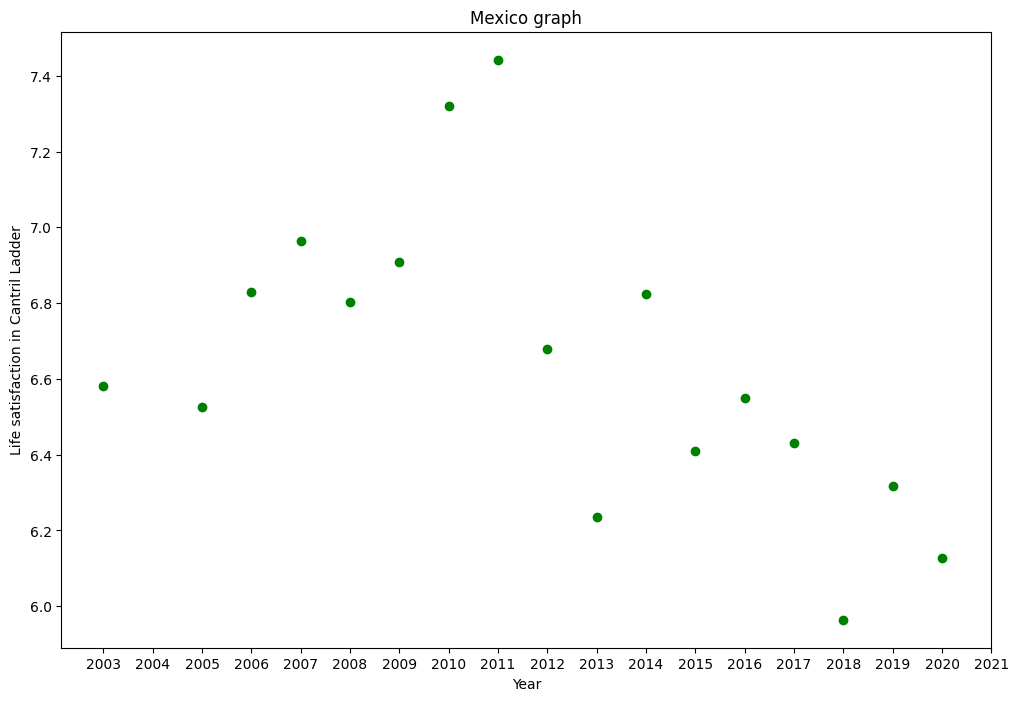

In [47]:
plt.figure(figsize=(12, 8))
plt.title("Mexico graph")
plt.xlabel("Year")
plt.ylabel("Life satisfaction in Cantril Ladder")

plt.scatter(
    dataset_mexico["Year"].astype(int),
    dataset_mexico["Life Satisfaction"],
    marker='o',
    color="green",
)
plt.xticks(dataset_mexico["Year"], dataset_mexico["Year"])
plt.show()